In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.linalg import eig

In [2]:
def V_harmonic(X):    
    k0=0
    k2=1.4494
    V_harm=[]
    for x in X:
        v_harm = k0 + k2*(x**2)
        V_harm.append(v_harm)
    return V_harm

In [3]:
def Schrodinger_harm(X):
    V=V_harmonic(X)
    dx = (X[-1]-X[0])/(len(X)-1)     #Angstrom 
    m  = 266.1*931.49*1.0e6          #Non dimensionalizing with eV/c^2
    h  = 1973.2698                   #eV/c
    a  = (h**2)/(2*m*(dx**2))        
    
    A=np.zeros([n,n])
    for i in range(1,n-1):
        A[i][i-1] = -a
        A[i][i]   = 2*a+V[i]
        A[i][i+1] = -a
    A[0][0] = 2*a+V[0]
    A[0][1] = -a
    A[-1][-2]=-a
    A[-1][-1]=2*a+V[-1]
    
    eigvals,eigvecs=eig(A)
    eigvecs = np.transpose(eigvecs)
    Eigens = np.column_stack((eigvals,eigvecs))
    Eigens=Eigens[Eigens[:, 0].argsort()]
    
    Eig = Eigens[0:6,0]
    Eigvecs= Eigens[0:6,1:]

    plt.figure(figsize=(8,8))
    plt.plot(X, V,'k')

    for i in range(len(Eig)):
        plt.axhline(Eig[i],linestyle='--')

    plt.ylim(0, Eigens[6][0])  # Set appropriate y-axis limits
    plt.yticks(Eig, ['E0', 'E1', 'E2', 'E3', 'E4', 'E5'])
    plt.xlabel("x--> (Angstrom)",fontsize=14)
    plt.ylabel("Energy h$\omega$ -->",fontsize=14)
    plt.xlim([-0.175,0.175])
    plt.title("Energy levels",fontsize=18)
    plt.savefig("Eigen_val.jpg",bbox_length='inches')
    plt.show()

    # Assuming Eigens is a 1D array or list containing energy values
    plt.figure(figsize=(8,8))
    plt.plot(X, V,'k')

    for i in range(len(Eig)-1):
        y = -np.array(Eigens[i,1:])+0.33*i #To separate the wavefunctions and make them distinct
        plt.plot(X,y)

    plt.xlabel("x--> (Angstrom)",fontsize=16)
    plt.ylabel("Wave Functions -->",fontsize=16)
    plt.yticks([0,0.33,0.66,0.99,1.32], ['$\Psi_0$', '$\Psi_1$', '$\Psi_2$', '$\Psi_3$', '$\Psi_4$'],fontsize=14)
    plt.title("Wave functions",fontsize=18)
    plt.savefig("Eigen_fun.jpg",bbox_length='inches')
    plt.show()  

In [4]:
n=1000
X=np.linspace(-1,1,n)

/tmp/ipykernel_844877/2540184616.py:38: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_length" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("Eigen_val.jpg",bbox_length='inches')


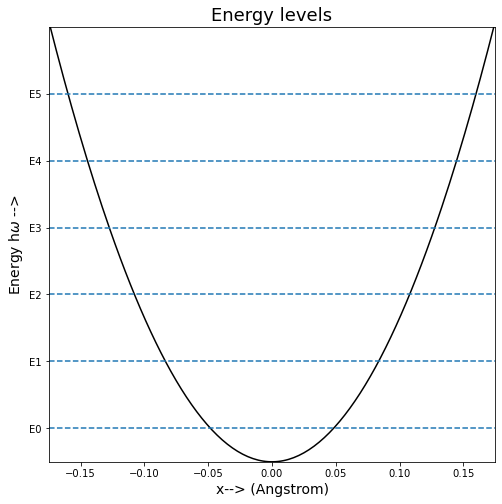

/tmp/ipykernel_844877/2540184616.py:53: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_length" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("Eigen_fun.jpg",bbox_length='inches')


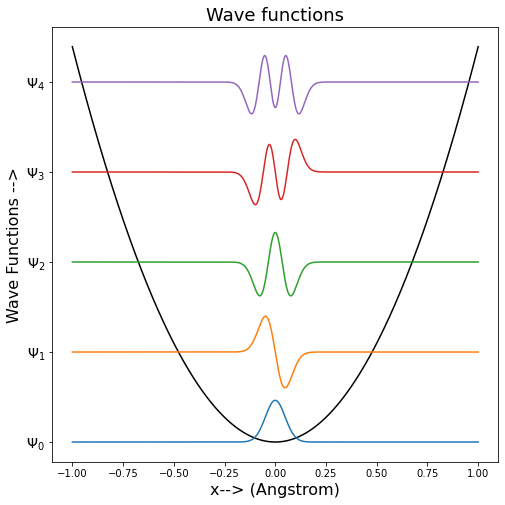

In [5]:
Schrodinger_harm(X)